# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
import pandas as pd
import json
import tweepy
import os
import numpy as np
import requests
import matplotlib.pyplot as plt

In [4]:
df_twitter=pd.read_csv('twitter-archive-enhanced.csv')
df_twitter.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [6]:
folder_name='images'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file :
    file.write(response.content)

In [7]:
df_image=pd.read_csv('images/image-predictions.tsv',sep='\t')
df_image.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [8]:
with open('tweet_json.txt') as f:
    df_api = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])
df_api.columns = ['tweet_id', 'favorites', 'retweets']
df_api.head()

tweet_id  favorites  retweets
0  892420643555336193      39467      8853
1  892177421306343426      33819      6514
2  891815181378084864      25461      4328
3  891689557279858688      42908      8964
4  891327558926688256      41048      9774

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
df_twitter

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [10]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df_twitter[df_twitter['rating_denominator'] != 10]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                 source  \
313   <a href="http://twitter.com/download/iphone" r...   
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   

                             

#### Tidiness issues for 'df_twitter'
1. duggo, pupper and puppo should be under one variable

#### Quality issues for 'df_twitter'
1. source contains html code
2. 'None' isn't considered null
3. timestamp is an object, not a datetime
4. some ratings have a denominator different than 10 
5. the names of some dogs are not correct, like 'a' and 'quite'

In [12]:
df_image

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

In [13]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
df_image.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [15]:
df_image.jpg_url.duplicated().sum()

66

#### Tidiness issues for 'df_image'
1. this dataset is not merged with 'df_twitter'

#### Quality issues for 'archive'
1. some images are not those of dogs as p1_dog, p2_dog and p3_dog are all false
2. columns names do not give much information about the content
3. there are some duplicated images and retweets

In [16]:
df_api

tweet_id  favorites  retweets
0     892420643555336193      39467      8853
1     892177421306343426      33819      6514
2     891815181378084864      25461      4328
3     891689557279858688      42908      8964
4     891327558926688256      41048      9774
5     891087950875897856      20562      3261
6     890971913173991426      12041      2158
7     890729181411237888      56848     16716
8     890609185150312448      28226      4429
9     890240255349198849      32467      7711
10    890006608113172480      31166      7624
11    889880896479866881      28268      5156
12    889665388333682689      38818      8538
13    889638837579907072      27672      4735
14    889531135344209921      15359      2321
15    889278841981685760      25652      5637
16    888917238123831296      29611      4709
17    888804989199671297      26080      4559
18    888554962724278272      20290      3732
19    888078434458587136      22201      3653
20    887705289381826560      30779      5609
21    887517139158093824      46959     12082
22    887473957103951883      69871     18781
23    887343217045368832      34222     10737
24    887101392804085760      31061      6167
25    886983233522544640      35859      8084
26    886736880519319552      12306      3443
27    886680336477933568      22798      4610
28    886366144734445568      21524      3316
29    886267009285017600        117         4
...                  ...        ...       ...
2324  666411507551481857        459       339
2325  666407126856765440        113        44
2326  666396247373291520        172        92
2327  666373753744588802        194       100
2328  666362758909284353        804       595
2329  666353288456101888        229        77
2330  666345417576210432        307       146
2331  666337882303524864        204        96
2332  666293911632134144        522       368
2333  666287406224695296        152        71
2334  666273097616637952        184        82
2335  666268910803644416        108        37
2336  666104133288665088      14765      6871
2337  666102155909144576         81        16
2338  666099513787052032        164        73
2339  666094000022159362        169        79
2340  666082916733198337        121        47
2341  666073100786774016        335       174
2342  666071193221509120        154        67
2343  666063827256086533        496       232
2344  666058600524156928        115        61
2345  666057090499244032        304       146
2346  666055525042405380        448       261
2347  666051853826850816       1253       879
2348  666050758794694657        136        60
2349  666049248165822465        111        41
2350  666044226329800704        311       147
2351  666033412701032449        128        47
2352  666029285002620928        132        48
2353  666020888022790149       2535       532

[2354 rows x 3 columns]

### Quality issues
1. source contains html code
2. 'None' isn't considered null
3. timestamp is an object, not a datetime
4. some ratings have denominators different than 10
5. the names of some dogs are not correct, like 'a' and 'quite'
6. some images are not those of dogs as p1_dog, p2_dog and p3_dog are all false
7. columns names do not give much information about the content
8. there are some duplicated images and retweets


### Tidiness issues
1. duggo, pupper and puppo are not variables

2. the three datasets aren't merged

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [17]:
# Make copies of original pieces of data
df_twitter_clean=df_twitter.copy()
df_image_clean=df_image.copy()
df_api_clean=df_api.copy()

### Issue #1: doggo, pupper, floofer and puppo are not variables

#### Define:  include duggo, pupper and puppo under the same column 'class'

### Issue #2: 'None' isn't considered null

#### Define: in our column 'class', we replace None by NaN

#### Code

In [18]:
df_twitter_clean.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [19]:
df_twitter_clean.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [20]:
df_twitter_clean.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [21]:
df_twitter_clean.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [22]:
x=np.repeat('abcdefj',len(df_twitter_clean),axis=None)
for i in range (len(df_twitter_clean)):
    if df_twitter_clean['doggo'][i]=='doggo':
        x[i]='doggo'
    elif df_twitter_clean['floofer'][i]=='floofer':
        x[i]='floofer'
    elif df_twitter_clean['pupper'][i]=='pupper':
        x[i]='pupper'
    elif df_twitter_clean['puppo'][i]=='puppo':
        x[i]='puppo' 
    else:
        x[i]='NaN'
df_twitter_clean=df_twitter_clean.drop(['doggo','floofer','pupper','puppo'],axis=1) 
df_twitter_clean['class']=x 

#### Test

In [23]:
df_twitter_clean['class'].value_counts()

NaN        1976
pupper      245
doggo        97
puppo        29
floofer       9
Name: class, dtype: int64

### Issue #3: 'source' contains html code

#### Define: delete the html part

#### Code

In [24]:
df_twitter_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [25]:
x=[]
for i in range (len(df_twitter_clean)):
    a=df_twitter_clean.source[i]
    a=a.split('=')[1]
    a=a[1:-5]
    x+=[a]
df_twitter_clean['source']=x

#### Test

In [26]:
df_twitter_clean.source.value_counts()

http://twitter.com/download/iphone              2221
http://vine.co                                    91
http://twitter.com                                33
https://about.twitter.com/products/tweetdeck      11
Name: source, dtype: int64

### Issue #4: timestamp is an object, not a datetime

#### Define: use pd.to_datetime to change the type of data

#### Code:

In [27]:
df_twitter_clean['timestamp']=pd.to_datetime(df_twitter_clean['timestamp'])

#### Test:

In [28]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
class                         2356 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 257.8+ KB


### Issue #5: some ratings do not have the right denominator (20,80,etc)

#### Define: use proportions to change denominator to 10 and change numerators accordingly

#### Code:

In [29]:
df_twitter_clean['rating_numerator']=df_twitter_clean['rating_numerator']/df_twitter_clean['rating_denominator']*10
x=np.repeat(10,len(df_twitter_clean),axis=None)
df_twitter_clean['rating_denominator']=x

#### Test:

In [30]:
df_twitter_clean['rating_denominator'].value_counts()

10    2356
Name: rating_denominator, dtype: int64

In [31]:
df_twitter_clean['rating_numerator'].value_counts()

12.000000      562
11.000000      469
10.000000      463
13.000000      351
9.000000       157
8.000000       102
14.000000       54
7.000000        54
5.000000        38
6.000000        32
3.000000        19
4.000000        15
2.000000        11
1.000000         8
0.000000         2
15.000000        2
8.181818         2
420.000000       2
75.000000        2
27.000000        1
6.363636         1
12.500000        1
26.000000        1
34.285714        1
inf              1
1776.000000      1
17.000000        1
7.333333         1
666.000000       1
182.000000       1
Name: rating_numerator, dtype: int64

### Issue #6: the names of some dogs are not correct, like 'a' and 'quite'

#### Define: replace those names with 'NaN'

#### Code:

In [32]:
df_twitter_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

We notice some names likes 'None','an','a'... Other than 'None', most names extracted wrong tend to have a lowercase first alphabet, so let's replace those firstand compile those in a list then replace them by 'Nan'

In [33]:
x=[]
for i in range (len(df_twitter_clean)):
    if df_twitter_clean['name'][i][0].islower() or df_twitter_clean['name'][i]=='None':
        x=x+['NaN']
    else:
        a=df_twitter_clean['name'][i]
        x=x+[a]
df_twitter_clean['name']=x

#### Test:

In [34]:
df_twitter_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'NaN', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer', 'Cody',
       'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold',
       'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Quinn', 'Belle', 'Zooey

### Issue #7: some images are not those of dogs as p1_dog, p2_dog and p3_dog are all false

#### Define: delete the rows where p1_dog, p2_dog and p3_dog are all false

#### Code:

In [35]:
x=[]
for i in range (len(df_image_clean)):
    if df_image_clean['p1_dog'][i]==False and df_image_clean['p2_dog'][i]==False and df_image_clean['p3_dog'][i]==False:
        x=x+[i]
df_image_clean=df_image_clean.drop(x,axis=0)

#### Test:

In [36]:
df_image_1=df_image_clean[df_image_clean['p1_dog']==False]
df_image_2=df_image_clean[df_image_clean['p2_dog']==False]
df_image_=df_image_clean[df_image_clean['p3_dog']==False]
df_image_=df_image_.append(df_image_1)
df_image_=df_image_.append(df_image_2)
df_image_

tweet_id                                            jpg_url  \
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
33    666430724426358785    https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg   
34    666435652385423360    https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg   
49    666835007768551424    https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg   
52    666996132027977728    https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg   
54    667044094246576128    https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg   
82    667491009379606528    https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg   
83    667495797102141441    https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg   
92    667546741521195010    https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg   
99    667773195014021121    https://pbs.twimg.com/media/CURoLrOVEAAaWdR.jpg   
109   667885044254572545    https://pbs.twimg.com/media/CUTN5V4XAAAIa4R.jpg   
113   667915453470232577    https://pbs.twimg.com/media/CUTpj-GWcAATc6A.jpg   
119   668171859951755264    https://pbs.twimg.com/media/CUXSwy8W4AA6uet.jpg   
144   668623201287675904    https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg   
145   668625577880875008    https://pbs.twimg.com/media/CUdvambWoAA007z.jpg   
149   668636665813057536    https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg   
150   668641109086707712    https://pbs.twimg.com/media/CUd9ivxWUAAuXSQ.jpg   
154   668779399630725120    https://pbs.twimg.com/media/CUf7UIaWUAEuKFr.jpg   
163   668960084974809088    https://pbs.twimg.com/media/CUifpn4WUAAS5X3.jpg   
173   669006782128353280    https://pbs.twimg.com/media/CUjKHs0WIAECWP3.jpg   
179   669324657376567296    https://pbs.twimg.com/media/CUnrN7vUcAAfGvN.jpg   
196   669597912108789760    https://pbs.twimg.com/media/CUrjvxiVEAA94dH.jpg   
223   670303360680108032    https://pbs.twimg.com/media/CU1lWFaVAAAl0HG.jpg   
234   670421925039075328    https://pbs.twimg.com/media/CU3RLqfW4AE0pbA.jpg   
237   670433248821026816    https://pbs.twimg.com/media/CU3be0SWEAEqb7I.jpg   
256   670764103623966721    https://pbs.twimg.com/media/CU8IY0pWIAA2AJ-.jpg   
258   670780561024270336    https://pbs.twimg.com/media/CU8XW2dWwAA-Lmc.jpg   
270   670822709593571328    https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg   
273   670832455012716544    https://pbs.twimg.com/media/CU9GjzrUkAAWPh4.jpg   
276   670840546554966016    https://pbs.twimg.com/media/CU9N6upXAAAbtQe.jpg   
...                  ...                                                ...   
1745  822975315408461824    https://pbs.twimg.com/media/C2vLrpvWIAA3LM3.jpg   
1749  823699002998870016    https://pbs.twimg.com/media/C25d3nkXEAAFBUN.jpg   
1765  826598365270007810    https://pbs.twimg.com/media/C3iq0EEXUAAdBYC.jpg   
1791  830583320585068544    https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg   
1801  831939777352105988    https://pbs.twimg.com/media/C4uk0EWWQAAaZm1.jpg   
1805  832273440279240704  https://pbs.twimg.com/ext_tw_video_thumb/83227...   
1817  834086379323871233    https://pbs.twimg.com/media/C5NFIsjWQAEI93t.jpg   
1828  835574547218894849    https://pbs.twimg.com/media/C5iOnigWcAAU3Ry.jpg   
1829  836001077879255040    https://pbs.twimg.com/media/C5oSiskU0AE8sJ_.jpg   
1830  836260088725786625    https://pbs.twimg.com/media/C5r-G2IUwAA6KBY.jpg   
1833  836753516572119041    https://pbs.twimg.com/media/C5y-4VwWcAIcaoj.jpg   
1834  836989968035819520    https://pbs.twimg.com/media/C52V7PzWcAA_pVv.jpg   
1841  838083903487373313    https://pbs.twimg.com/media/C6F42cGUYAAIKsX.jpg   
1843  838561493054533637    https://pbs.twimg.com/media/C6MrOsEXQAENOds.jpg   
1857  841680585030541313    https://pbs.twimg.com/media/C65AA7_WoAEGqA9.jpg   
1860  842163532590374912    https://pbs.twimg.com/media/C6_3QgMWsAMNnAk.jpg   
1862  842765311967449089    https://pbs.twimg.com/media/C7IalMVX0AATKRD.jpg   
1872  844979544864018432    https://pbs.twimg.com/media/C7n4aQ0VAAAohkL.jpg   
1893  849412302885593088    https://pbs.twimg.com/media/C8m3-iQVoA

### Issue #8: columns names ('p1', etc) do not give much information about the content

#### Define: change the names of the columns

#### Code:

In [37]:
df_image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [38]:
x=['tweet_id', 'jpg_url', 'img_num', '1st assumption', '1st assumption probability', '1st assumption is a dog', '2nd assumption','2nd assumption probability', '2nd assumption is a dog', '3rd assumption','3rd assumption probability', '3rd assumption is a dog']
df_image_clean.columns=x

#### Test:

In [39]:
df_image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', '1st assumption',
       '1st assumption probability', '1st assumption is a dog',
       '2nd assumption', '2nd assumption probability',
       '2nd assumption is a dog', '3rd assumption',
       '3rd assumption probability', '3rd assumption is a dog'],
      dtype='object')

### Issue #9: there are some duplicated images and retweets

#### Define: delete duplicated images and retweets

#### Code:

Duplicated images:

In [40]:
df_image_clean['jpg_url'].drop_duplicates(inplace=True)

#### Test:

In [41]:
df_image_clean['jpg_url'].duplicated().sum()

0

Retweets:

#### Code:

In [49]:
x=[]
for i in range (len(df_twitter)):
    if pd.notna(df_twitter['retweeted_status_id'][i]):
        x+=[i]
        
x

[19,
 32,
 36,
 68,
 73,
 74,
 78,
 91,
 95,
 97,
 101,
 109,
 118,
 124,
 130,
 132,
 137,
 146,
 155,
 159,
 160,
 165,
 171,
 180,
 182,
 185,
 194,
 195,
 204,
 211,
 212,
 222,
 230,
 231,
 247,
 250,
 260,
 266,
 272,
 273,
 281,
 285,
 286,
 289,
 298,
 302,
 303,
 307,
 309,
 310,
 319,
 327,
 332,
 340,
 341,
 343,
 357,
 359,
 366,
 382,
 386,
 397,
 399,
 406,
 411,
 415,
 420,
 422,
 425,
 431,
 434,
 435,
 438,
 446,
 447,
 450,
 453,
 455,
 462,
 465,
 469,
 475,
 476,
 479,
 485,
 488,
 506,
 522,
 530,
 535,
 538,
 541,
 543,
 546,
 552,
 555,
 558,
 561,
 566,
 568,
 574,
 577,
 581,
 583,
 586,
 589,
 594,
 595,
 596,
 597,
 598,
 599,
 600,
 601,
 602,
 603,
 604,
 605,
 606,
 612,
 615,
 618,
 627,
 629,
 634,
 654,
 655,
 656,
 661,
 664,
 669,
 671,
 677,
 682,
 686,
 692,
 694,
 702,
 720,
 728,
 741,
 742,
 745,
 749,
 753,
 759,
 764,
 767,
 770,
 773,
 778,
 784,
 794,
 800,
 811,
 815,
 818,
 822,
 826,
 829,
 833,
 841,
 847,
 860,
 868,
 872,
 885,
 890,
 8

In [50]:
df_twitter=df_twitter.drop(x,axis=0)

#### Test:

In [53]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

Since all the values in retweeted_id_status are null, there are obviously no retwets in the dataset.

### Issue #10: the three datasets are not merged

#### Define: merge the three datasets using common tweet id

#### Code:

In [54]:
df_1=pd.merge(df_twitter_clean,df_image_clean)
df=pd.merge(df_1,df_api_clean)

#### Test:

In [55]:
df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892177421306343426                    NaN                  NaN   
1  891815181378084864                    NaN                  NaN   
2  891689557279858688                    NaN                  NaN   
3  891327558926688256                    NaN                  NaN   
4  891087950875897856                    NaN                  NaN   

            timestamp                              source  \
0 2017-08-01 00:17:27  http://twitter.com/download/iphone   
1 2017-07-31 00:18:03  http://twitter.com/download/iphone   
2 2017-07-30 15:58:51  http://twitter.com/download/iphone   
3 2017-07-29 16:00:24  http://twitter.com/download/iphone   
4 2017-07-29 00:08:17  http://twitter.com/download/iphone   

                                                text  retweeted_status_id  \
0  This is Tilly. She's just checking pup on you....                  NaN   
1  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
2  This is Darla. She commenced a snooze mid meal...                  NaN   
3  This is Franklin. He would like you to stop ca...                  NaN   
4  Here we have a majestic great white breaching ...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls   ...     \
0  https://twitter.com/dog_rates/status/892177421...   ...      
1  https://twitter.com/dog_rates/status/891815181...   ...      
2  https://twitter.com/dog_rates/status/891689557...   ...      
3  https://twitter.com/dog_rates/status/891327558...   ...      
4  https://twitter.com/dog_rates/status/891087950...   ...      

   1st assumption probability  1st assumption is a dog      2nd assumption  \
0                    0.323581                     True            Pekinese   
1                    0.716012                     True            malamute   
2                    0.170278                    False  Labrador_retriever   
3                    0.555712                     True    English_springer   
4                    0.425595                     True       Irish_terrier   

  2nd assumption probability 2nd assumption is a dog  \
0                   0.090647                    True   
1                   0.078253                    True   
2                   0.168086                    True   
3                   0.225770                    True   
4                   0.116317                    True   

                3rd assumption 3rd assumption probability  \
0                     papillon                   0.068957   
1                       kelpie                   0.031379   
2                      spatula                   0.040836   
3  German_short-haired_pointer                   0.175219   
4              Indian_elephant                   0.076902   

   3rd assumption is a dog  favorites retweets  
0                     True      33819     6514  
1                     True      25461     4328  
2                    False      42908     8964  
3                     True      41048     9774  
4                    False      20562     3261  

[5 rows x 27 columns]

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [56]:
df.to_csv("twitter_archive_master.csv",index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

Lets' first see which dog races have the highest and lowest ratings.

In [57]:
df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  1.750000e+03           2.000000e+01         2.000000e+01   
mean   7.415058e+17           6.949452e+17         4.196984e+09   
std    6.808146e+16           4.455933e+16         0.000000e+00   
min    6.660209e+17           6.671522e+17         4.196984e+09   
25%    6.782926e+17           6.716877e+17         4.196984e+09   
50%    7.182408e+17           6.756022e+17         4.196984e+09   
75%    7.964605e+17           6.947919e+17         4.196984e+09   
max    8.921774e+17           8.558181e+17         4.196984e+09   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         6.400000e+01              6.400000e+01       1750.000000   
mean          7.614038e+17              1.230409e+16         10.930189   
std           5.595622e+16              9.843272e+16          2.477703   
min           6.675094e+17              7.832140e+05          0.000000   
25%           7.126063e+17              4.196984e+09         10.000000   
50%           7.783702e+17              4.196984e+09         11.000000   
75%           7.945091e+17              4.196984e+09         12.000000   
max           8.768508e+17              7.874618e+17         75.000000   

       rating_denominator      img_num  1st assumption probability  \
count              1750.0  1750.000000                 1750.000000   
mean                 10.0     1.214286                    0.604089   
std                   0.0     0.574194                    0.265942   
min                  10.0     1.000000                    0.044333   
25%                  10.0     1.000000                    0.376910   
50%                  10.0     1.000000                    0.605121   
75%                  10.0     1.000000                    0.848727   
max                  10.0     4.000000                    0.999984   

       2nd assumption probability  3rd assumption probability      favorites  \
count                 1750.000000                1.750000e+03    1750.000000   
mean                     0.137762                6.162485e-02    8895.441714   
std                      0.101307                5.193222e-02   12471.951176   
min                      0.000010                2.160900e-07       0.000000   
25%                      0.055169                1.606823e-02    1860.250000   
50%                      0.121816                5.002455e-02    4145.500000   
75%                      0.199461                9.481310e-02   11270.750000   
max                      0.467678                2.734190e-01  132810.000000   

           retweets  
count   1750.000000  
mean    3043.297714  
std     5205.557005  
min       16.000000  
25%      665.000000  
50%     1505.000000  
75%     3494.750000  
max    79515.000000

In [58]:
df=df.reset_index()

Before we analyse one columns at a time, let's make sure that the variable has only dog races

Ror this purpose, we'll delete each time the non corresponding to dog labels for each column

In [59]:
x=[]
for i in range (len(df)):
    if df['1st assumption is a dog'][i]==False:
        x=x+[i]
rating_1=df.drop(x,axis=0)

In [60]:
rating_11=rating_1.groupby('1st assumption').mean()['rating_numerator']
rating_11.sort_values(ascending=True)

1st assumption
Japanese_spaniel                5.000000
Norwich_terrier                 9.000000
Ibizan_hound                    9.000000
Walker_hound                    9.000000
Scotch_terrier                  9.000000
Welsh_springer_spaniel          9.000000
soft-coated_wheaten_terrier     9.090909
miniature_schnauzer             9.250000
Tibetan_terrier                 9.250000
dalmatian                       9.384615
Boston_bull                     9.444444
Maltese_dog                     9.500000
redbone                         9.666667
Rhodesian_ridgeback             9.750000
Airedale                        9.833333
miniature_poodle                9.875000
Great_Dane                      9.888889
Italian_greyhound               9.937500
groenendael                    10.000000
Brabancon_griffon              10.000000
Bedlington_terrier             10.000000
English_setter                 10.000000
papillon                       10.125000
Saint_Bernard                  10.142857
N

In [61]:
x=[]
for i in range (len(df)):
    if df['2nd assumption is a dog'][i]==False:
        x=x+[i]
rating_2=df.drop(x,axis=0)
rating_2=rating_2.groupby('2nd assumption').mean()['rating_numerator']
rating_2.sort_values(ascending=True)

2nd assumption
Australian_terrier              7.500000
English_foxhound                8.000000
komondor                        8.000000
standard_schnauzer              9.000000
affenpinscher                   9.000000
Greater_Swiss_Mountain_dog      9.166667
Mexican_hairless                9.250000
basset                          9.333333
Brittany_spaniel                9.375000
English_springer                9.400000
Leonberg                        9.400000
giant_schnauzer                 9.500000
Rottweiler                      9.500000
West_Highland_white_terrier     9.538462
Yorkshire_terrier               9.600000
cairn                           9.750000
miniature_pinscher              9.800000
Norfolk_terrier                 9.833333
boxer                           9.846154
whippet                         9.866667
Lakeland_terrier                9.888889
Weimaraner                     10.000000
Old_English_sheepdog           10.000000
standard_poodle                10.000000
s

In [62]:
x=[]
for i in range (len(df)):
    if df['3rd assumption is a dog'][i]==False:
        x=x+[i]
rating_3=df.drop(x,axis=0)
rating_3=rating_3.groupby('3rd assumption').mean()['rating_numerator']
rating_3.sort_values(ascending=True)

3rd assumption
Dandie_Dinmont                  8.500000
silky_terrier                   9.000000
Siberian_husky                  9.210526
Japanese_spaniel                9.250000
wire-haired_fox_terrier         9.333333
schipperke                      9.333333
Gordon_setter                   9.500000
collie                          9.642857
Great_Dane                      9.666667
Mexican_hairless                9.750000
Afghan_hound                    9.750000
Shih-Tzu                        9.777778
Doberman                       10.000000
Walker_hound                   10.000000
flat-coated_retriever          10.000000
cairn                          10.000000
affenpinscher                  10.000000
French_bulldog                 10.038462
German_short-haired_pointer    10.125000
Ibizan_hound                   10.142857
whippet                        10.222222
Boston_bull                    10.235294
borzoi                         10.250000
miniature_pinscher             10.285714
R

We notice that the dogs having the lowest ratings are those of unknown breeds, like Japanese spaniel or schipperke. Those of the highest ratings tend to have a lot of fluff and a cute disposition, loke chows and samoyeds. Rare are the popular races that are not fluffy, like doberman per example.

 Let's see now dog races that have the highest number of retweets and favourites.

In [63]:
retweets=rating_1.groupby('1st assumption').mean()['retweets']
retweets.sort_values(ascending=False)

1st assumption
standard_poodle                11081.375000
Afghan_hound                    7162.750000
English_springer                5591.500000
Tibetan_mastiff                 5335.800000
Saluki                          5133.750000
Cardigan                        5123.105263
Samoyed                         4940.418605
Eskimo_dog                      4768.888889
Great_Pyrenees                  4732.285714
Lakeland_terrier                4729.823529
French_bulldog                  4683.923077
flat-coated_retriever           4520.250000
Irish_water_spaniel             4500.666667
Labrador_retriever              4273.430000
black-and-tan_coonhound         4164.500000
cocker_spaniel                  4097.966667
Norwegian_elkhound              3906.250000
golden_retriever                3874.466667
Mexican_hairless                3865.250000
Leonberg                        3863.666667
giant_schnauzer                 3849.333333
Chihuahua                       3665.277108
Border_terrier   

In [64]:
favorites=rating_1.groupby('1st assumption').mean()
favorites['favorites'].sort_values(ascending=False)

1st assumption
Saluki                         24060.000000
French_bulldog                 17913.000000
black-and-tan_coonhound        17012.000000
flat-coated_retriever          16791.625000
Irish_water_spaniel            16400.000000
Leonberg                       14934.333333
English_springer               14091.500000
basset                         13866.000000
standard_poodle                13812.750000
Cardigan                       13699.315789
Border_terrier                 13578.000000
Bedlington_terrier             13025.000000
Afghan_hound                   12995.000000
Great_Pyrenees                 12932.000000
Mexican_hairless               12640.500000
Samoyed                        12627.697674
giant_schnauzer                12442.000000
Lakeland_terrier               12193.647059
Eskimo_dog                     12001.555556
Weimaraner                     11982.750000
golden_retriever               11310.846667
Pembroke                       11304.034091
Labrador_retrieve

The dog races having their pictures most retweeted and liked are a tad different than what the ratings insuniated, as standard poodles are most retweeted even though they didn't appear at the top ratings, for example.

### Insights:
1. Most higher ratings are given to dogs with popular breeds and furry body. We can name: Samoyed , golden retrieves, etc. Dobermans are the exception: they are loyal watchdogs and police dogs, making them popular despite them not having the above standards.

2. The lowest ratings are given to those with races that aren't well known like 'dalmatian' or 'red bone'. Fair enough, since there are so many dog races that some are bound to be some popular than others. Lower rating can also be attributed to less furriness, which corresponds to less cuteness for the majority of people.

3. The difference between ratings, retweets and favorites insinuate that either the data isn't well extracted or that there's a certain subjectivity in the observation. The fluctuations shows a great disparity between the users' tastes and opinion about what dog looks the best.

### Visualization

Let's visualise the number of retweets.

<Container object of 111 artists>

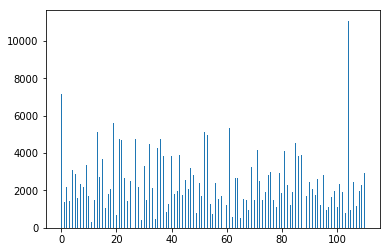

In [65]:
ind=np.arange(len(retweets))
width=0.35
plt.bar(ind,retweets,width)

We notice that Standard poodle wins by a large margin over the other breeds.